# Data Wrangling II
Create an “Academic performance” dataset of students and perform the following operations using
Python.
1. Scan all variables for missing values and inconsistencies. If there are missing values and/or
inconsistencies, use any of the suitable techniques to deal with them.
2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques
to deal with them.
3. Apply data transformations on at least one of the variables. The purpose of this
transformation should be one of the following reasons: to change the scale for better
understanding of the variable, to convert a non-linear relation into a linear one, or to decrease
the skewness and convert the distribution into a normal distribution.
Reason and document your approach properly.

In [69]:
import pandas as pd 
import numpy as np

In [70]:
np.random.seed(42)
data = { 
    "student_ID" : range(1,101),
    "Age" : np.random.randint(18,25,100),
    "gender" : np.random.choice(['male','female'], 100),
    "study_hours" : np.append(np.random.normal(3,1,95), [13,11,0,2,6]),
    "attendance" : np.random.uniform(60,100,100),
    "Test_Score": np.append(np.random.normal(70, 10, 97), [30, 32, 28]),
    "gpa" : np.random.normal(3.0,0.5,100)

}

In [71]:
df = pd.DataFrame(data)
df.head()

,student_ID,Age,gender,study_hours,attendance,Test_Score,gpa
0,1,24,female,4.477894,83.076155,84.535341,2.990492
1,2,21,female,2.481730,79.700708,74.438194,2.498735
2,3,22,male,2.191506,67.809720,77.746341,2.990743
3,4,24,female,2.498243,88.898085,60.730695,2.855671
4,5,20,male,3.915402,71.230894,69.404746,3.161359


In [72]:
df.isnull().sum()

student_ID     0
Age            0
gender         0
study_hours    0
attendance     0
Test_Score     0
gpa            0
dtype: int64

In [73]:
df.loc[5, 'study_hours'] = np.nan
df.loc[[1,4,67,32,5], 'Test_Score'] = np.nan 
df.loc[32, 'attendance'] = np.nan
df.head(7)

,student_ID,Age,gender,study_hours,attendance,Test_Score,gpa
0,1,24,female,4.477894,83.076155,84.535341,2.990492
1,2,21,female,2.481730,79.700708,NaN,2.498735
2,3,22,male,2.191506,67.809720,77.746341,2.990743
3,4,24,female,2.498243,88.898085,60.730695,2.855671
4,5,20,male,3.915402,71.230894,NaN,3.161359
5,6,22,female,NaN,60.972639,NaN,2.586385
6,7,22,female,2.470240,85.818892,59.756124,3.259673


In [74]:
df.isnull().sum()

student_ID     0
Age            0
gender         0
study_hours    1
attendance     1
Test_Score     5
gpa            0
dtype: int64

In [75]:
# handling missing values
df['study_hours'].fillna(df["study_hours"].mean(), inplace=True)
df['attendance'].fillna(df['attendance'].median(), inplace=True)
df['Test_Score'].fillna(df['Test_Score'].median(), inplace=True)


/var/folders/yj/9wfz_8rx43q67nx6ltqgdbbw0000gn/T/ipykernel_39911/4081266505.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['study_hours'].fillna(df["study_hours"].mean(), inplace=True)
/var/folders/yj/9wfz_8rx43q67nx6ltqgdbbw0000gn/T/ipykernel_39911/4081266505.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are set

In [76]:
# test for outliers:
from scipy.stats import zscore
cols = ['study_hours', 'Test_Score']
z_scores = df[cols].apply(zscore)
outliers = (z_scores.abs()>3)
print("outliers: ", outliers.sum())


outliers:  study_hours    2
Test_Score     3
dtype: int64


In [77]:
for col in cols:
    lower = df[col].quantile(0.01)
    higher = df[col].quantile(0.99)
    df[col] = df[col].clip(lower,higher)
                              

In [80]:
for col in cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers_iqr = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col} - Outliers Detected (IQR):", outliers_iqr.shape[0])

study_hours - Outliers Detected (IQR): 3
Test_Score - Outliers Detected (IQR): 3


In [81]:
from scipy.stats import boxcox
df['study_hours'] = np.where(df['study_hours']>0,df['study_hours'],0.1)
df['study_hours_boxcox'], _ = boxcox(df['study_hours'])


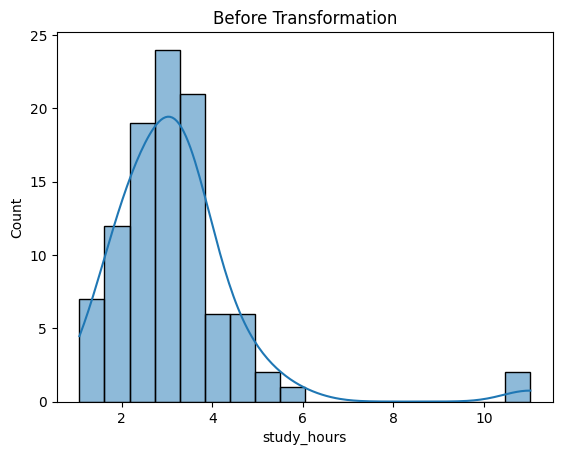

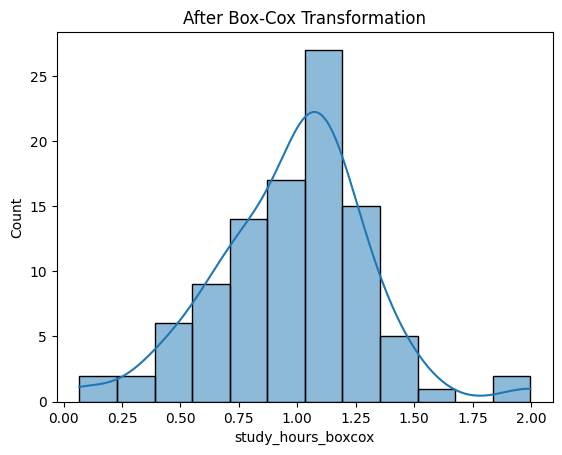

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(df['study_hours'], kde=True)
plt.title("Before Transformation")
plt.show()

sns.histplot(df['study_hours_boxcox'], kde=True)
plt.title("After Box-Cox Transformation")
plt.show()